In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import sklearn.metrics as sm
from sklearn.neighbors import NearestNeighbors


In [2]:
df_org = pd.read_csv(r'BD Tratado\VariaveisValidadas.csv',sep=';')
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35862 entries, 0 to 35861
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MATRÍCULA                 35862 non-null  int64  
 1   ATRASO                    35862 non-null  float64
 2   Carga                     35862 non-null  float64
 3   Tempo de casa             35862 non-null  float64
 4   SALÁRIO                   35862 non-null  float64
 5   SO                        35862 non-null  float64
 6   SX                        35862 non-null  float64
 7   MANUAL                    35862 non-null  float64
 8   dist                      35862 non-null  float64
 9   HORÁRIO INÍCIO            35862 non-null  float64
 10  HORÁRIO FINAL             35862 non-null  float64
 11  DiaSemana                 35862 non-null  int64  
 12  DiaSemana_0               35862 non-null  int64  
 13  DiaSemana_1               35862 non-null  int64  
 14  DiaSem

In [3]:
df_cluster = df_org.drop(['MATRÍCULA', 'Mes', 'Mes_1', 'Mes_2', 'Mes_3', 'Mes_4', 'Mes_5', 'Mes_6', 'Mes_7', 'Mes_8', 'Mes_9', 'Mes_10', 'Mes_11', 'Mes_12', 
                          'SalarioMin','DiaSemana', 'DiaSemana_0', 'DiaSemana_1', 'DiaSemana_2', 'DiaSemana_3', 'DiaSemana_4', 'DiaSemana_5', 'DiaSemana_6',
                          'SO','SX','MANUAL','HORÁRIO INÍCIO','HORÁRIO FINAL'],axis=1)
df_resto = df_org[['MATRÍCULA', 'Mes', 'Mes_1', 'Mes_2', 'Mes_3', 'Mes_4', 'Mes_5', 'Mes_6', 'Mes_7', 'Mes_8', 'Mes_9', 'Mes_10', 'Mes_11', 'Mes_12', 
                          'SalarioMin','DiaSemana', 'DiaSemana_0', 'DiaSemana_1', 'DiaSemana_2', 'DiaSemana_3', 'DiaSemana_4', 'DiaSemana_5', 'DiaSemana_6',
                          'SO','SX','MANUAL','HORÁRIO INÍCIO','HORÁRIO FINAL']]
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35862 entries, 0 to 35861
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ATRASO                    35862 non-null  float64
 1   Carga                     35862 non-null  float64
 2   Tempo de casa             35862 non-null  float64
 3   SALÁRIO                   35862 non-null  float64
 4   dist                      35862 non-null  float64
 5   SINDICATO_SCABEL          35862 non-null  int64  
 6   SINDICATO_SEACONS         35862 non-null  int64  
 7   SINDICATO_SEEAC           35862 non-null  int64  
 8   SINDICATO_SEMAPI          35862 non-null  int64  
 9   SINDICATO_SIEMACO         35862 non-null  int64  
 10  SINDICATO_SIEMACO         35862 non-null  int64  
 11  SINDICATO_SINDA           35862 non-null  int64  
 12  SINDICATO_SINDEAC         35862 non-null  int64  
 13  SINDICATO_SINDEEPRES      35862 non-null  int64  
 14  SINDIC

In [4]:
X = MinMaxScaler().fit_transform(df_cluster)

In [5]:
scores = []
inertias =[]
for i in tqdm( range(2, 10)):
    kmeans = KMeans(n_clusters = i, max_iter=100, random_state = 42).fit(X)    
    #soma dos quadrados intra-clusters de cada cluster
    inertias.append(kmeans.inertia_)
    scores.append(silhouette_score(df_cluster.values, kmeans.labels_, random_state = 42))

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [01:39<00:00, 12.44s/it]


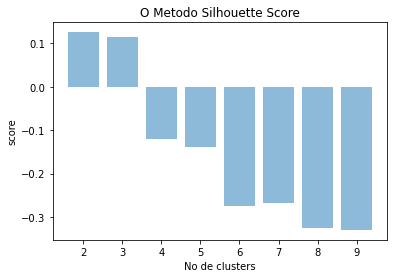

In [6]:
plt.figure(2)
plt.bar(range(2, 10), scores,  align='center', alpha=0.5)
plt.title('O Metodo Silhouette Score')
plt.xlabel('No de clusters')
plt.ylabel('score')
plt.show()

In [7]:
bestKmeans = KMeans(n_clusters = 2, max_iter=100, random_state = 42).fit(X)
labels = bestKmeans.labels_ 
sm.silhouette_score(df_cluster.values, bestKmeans.labels_, random_state = 42)

0.1258039116770407

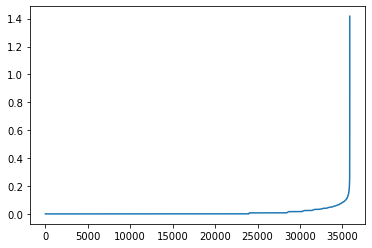

In [8]:
#Selecionando o melhor valor para o eps
neigh = NearestNeighbors(n_neighbors=3)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
# Estimativa retirada após a análise de cotovelo
melhor_eps = 0
silhouette_score = 0

# Min Sample > 2 para não formar um cluster com único ponto
estimativa_min_sample = 0

# Numero de Clusters
n_clusters_ = 0

# Numero de Ruido
n_noise_ = 0

# Descobrir o melhor valor mínimo de Samples
for eps in tqdm([0.3,0.35,0.4]):
    for x_sample in range(7,9):
        db = DBSCAN(eps=eps, min_samples=x_sample).fit(X)
        labels = db.labels_
        if silhouette_score <= sm.silhouette_score(X, labels):
            silhouette_score = sm.silhouette_score(X, labels)
            estimativa_min_sample = x_sample
            melhor_eps = eps
            # Numero de Clusters
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
            # Numero de Ruido
            n_noise_ = list(labels).count(-1)

db = DBSCAN(eps=melhor_eps, min_samples=estimativa_min_sample).fit(X)
labels = db.labels_

print('Valor ideal para min_samples: %d' % estimativa_min_sample)
print('Valor ideal para EPS: %0.3f' % melhor_eps)
print('Número estimado de Clusters: %d' % n_clusters_)
print('Número estimado de ruídos: %d' % n_noise_)
print('Silhouette Score: %0.3f' % sm.silhouette_score(X, labels))
print(set(labels))

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [03:10<00:00, 63.62s/it]


Valor ideal para min_samples: 8
Valor ideal para EPS: 0.400
Número estimado de Clusters: 36
Número estimado de ruídos: 39


In [ ]:
df_cluster['cluster'] = db.labels_
df_cluster.head()

In [ ]:
df_cluster.groupby('cluster')['ATRASO'].count().sort_values(ascending=False)

In [ ]:
df = df_resto.merge(df_cluster,how = 'inner', right_index=True, left_index=True)
df.info()

In [ ]:
df.to_csv(r'BD Tratado\cluster.csv',sep=';',index=False)